In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

In [3]:
train['flag'] = 1
test['flag'] = 0
df = pd.concat([train,test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,flag
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


## Analisando os campos

In [4]:
df[df['flag']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  flag         891 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 97.5+ KB


Temos valores faltantes em Cabin, Age e Embarked. 

Como embarked temos apenas 2 valores faltantes, se formos utilizar essa feature, vamos retirar os dados faltantes.

### Analisando os valores faltantes

In [5]:
source = df[df['flag']==1]

alt.Chart(source).mark_bar().encode(
    alt.X("Age:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [6]:
alt.Chart(source).mark_bar().encode(
    alt.X("SibSp:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [7]:
alt.Chart(source).mark_bar().encode(
    alt.X("Parch:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [8]:
alt.Chart(source).mark_bar().encode(
    alt.X("Fare:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [9]:
df['norm_fare'] = np.log(df.Fare+1)

In [10]:
source = df[df['flag']==1]

In [11]:
alt.Chart(source).mark_bar().encode(
    alt.X("norm_fare:Q", bin=True),
    y='count()',
)

alt.Chart(...)

Cabin é um objeto, vamos analisar de outra forma

In [12]:
df[df['flag']==1].Cabin.values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

Como as cabines são valores de texto, vamos deixar os valores sem informação, como sem informação. e vamos utilizar as outras informações das cabines como uma feature. 

In [13]:
df[df['flag']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,flag,norm_fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0,2.962246
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0,2.737881
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0,6.240917


In [14]:
pd.pivot_table(df[df['flag']==1], index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0.0,30.626179,22.117887,0.329690,0.553734
1.0,28.343690,48.395408,0.464912,0.473684


In [15]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [16]:
df.Age = df.Age.fillna(df.Age.median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  flag         1309 non-null   int64  
 13  norm_fare    1308 non-null   float64
 14  cabin_adv    1309 non-null   object 
dtypes: float64(4), int64(5), object(6)
memory usage: 163.6+ KB


In [18]:
df.dropna(subset=['Embarked'],inplace = True)

In [19]:
df[df['flag']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    float64
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  flag         889 non-null    int64  
 13  norm_fare    889 non-null    float64
 14  cabin_adv    889 non-null    object 
dtypes: float64(4), int64(5), object(6)
memory usage: 111.1+ KB


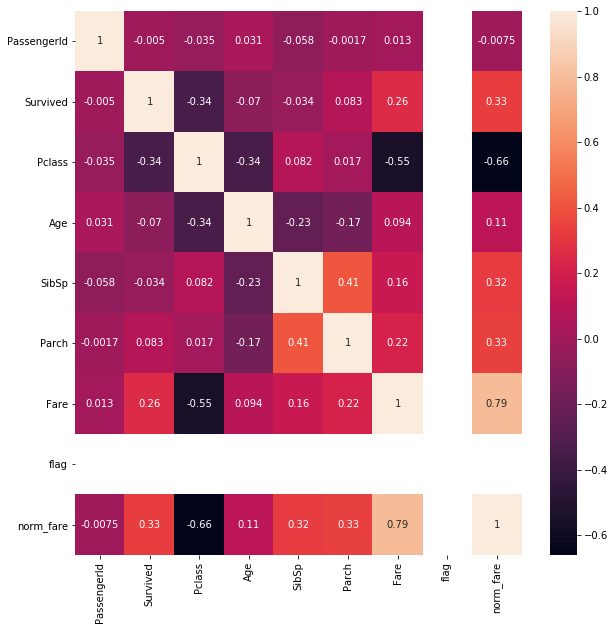

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df[df['flag']==1].corr(), annot=True)

In [21]:
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [22]:
df[df['flag']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    float64
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           202 non-null    object 
 11  Embarked        889 non-null    object 
 12  flag            889 non-null    int64  
 13  norm_fare       889 non-null    float64
 14  cabin_adv       889 non-null    object 
 15  numeric_ticket  889 non-null    int64  
 16  ticket_letters  889 non-null    object 
dtypes: float64(4), int64(6), object(7)


In [23]:
base_model = pd.concat([df,pd.get_dummies(df[['Sex','Embarked','cabin_adv']])],axis=1) 


In [24]:
base_model.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'flag', 'norm_fare',
       'cabin_adv', 'numeric_ticket', 'ticket_letters', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A',
       'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E',
       'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n'],
      dtype='object')

In [25]:
df[df['flag']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    float64
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           202 non-null    object 
 11  Embarked        889 non-null    object 
 12  flag            889 non-null    int64  
 13  norm_fare       889 non-null    float64
 14  cabin_adv       889 non-null    object 
 15  numeric_ticket  889 non-null    int64  
 16  ticket_letters  889 non-null    object 
dtypes: float64(4), int64(6), object(7)


In [26]:
col = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch',
       'numeric_ticket', 'norm_fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A',
       'cabin_adv_B', 'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E',
       'cabin_adv_F', 'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n','flag']

In [27]:
df_final = base_model[col].copy()

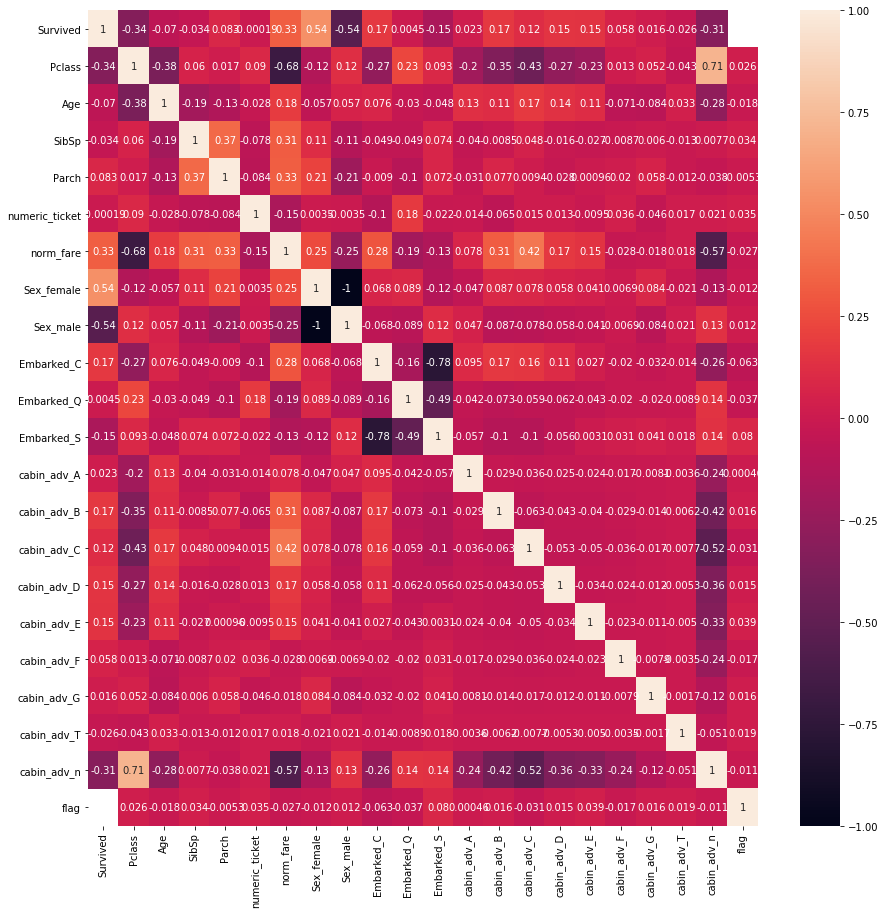

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df_final.corr(), annot=True)

In [29]:
df_final.drop(columns=["Embarked_C",'Sex_female','Pclass'], inplace=True)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [31]:
df_final[df_final['flag']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    float64
 1   Age             889 non-null    float64
 2   SibSp           889 non-null    int64  
 3   Parch           889 non-null    int64  
 4   numeric_ticket  889 non-null    int64  
 5   norm_fare       889 non-null    float64
 6   Sex_male        889 non-null    uint8  
 7   Embarked_Q      889 non-null    uint8  
 8   Embarked_S      889 non-null    uint8  
 9   cabin_adv_A     889 non-null    uint8  
 10  cabin_adv_B     889 non-null    uint8  
 11  cabin_adv_C     889 non-null    uint8  
 12  cabin_adv_D     889 non-null    uint8  
 13  cabin_adv_E     889 non-null    uint8  
 14  cabin_adv_F     889 non-null    uint8  
 15  cabin_adv_G     889 non-null    uint8  
 16  cabin_adv_T     889 non-null    uint8  
 17  cabin_adv_n     889 non-null    uin

In [32]:
source = df_final[df_final['flag']==1]

alt.Chart(source).mark_bar().encode(
    alt.X("Age:Q", bin=True),
    y='count()',
)

alt.Chart(...)

In [33]:
df_final[df_final['flag']==1].describe()

,Survived,Age,SibSp,Parch,numeric_ticket,norm_fare,Sex_male,Embarked_Q,Embarked_S,cabin_adv_A,cabin_adv_B,cabin_adv_C,cabin_adv_D,cabin_adv_E,cabin_adv_F,cabin_adv_G,cabin_adv_T,cabin_adv_n,flag
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.0
mean,0.382452,29.315152,0.524184,0.382452,0.741282,2.959024,0.649044,0.086614,0.724409,0.016873,0.050619,0.066367,0.037120,0.035996,0.014623,0.004499,0.001125,0.772778,1.0
std,0.486260,12.984932,1.103705,0.806761,0.438177,0.967750,0.477538,0.281427,0.447063,0.128868,0.219341,0.249062,0.189163,0.186384,0.120106,0.066964,0.033539,0.419273,0.0
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,22.000000,0.000000,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,0.000000,28.000000,0.000000,0.000000,1.000000,2.737881,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,1.000000,35.000000,1.000000,0.000000,1.000000,3.465736,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,1.000000,80.000000,8.000000,6.000000,1.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [34]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

train_scaled = df_final.copy()

scale.fit(train_scaled[['Age','SibSp','Parch','norm_fare']])

train_scaled[['Age','SibSp','Parch','norm_fare']] = scale.transform(train_scaled[['Age','SibSp','Parch','norm_fare']])


In [35]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    float64
 1   Age             1307 non-null   float64
 2   SibSp           1307 non-null   float64
 3   Parch           1307 non-null   float64
 4   numeric_ticket  1307 non-null   int64  
 5   norm_fare       1306 non-null   float64
 6   Sex_male        1307 non-null   uint8  
 7   Embarked_Q      1307 non-null   uint8  
 8   Embarked_S      1307 non-null   uint8  
 9   cabin_adv_A     1307 non-null   uint8  
 10  cabin_adv_B     1307 non-null   uint8  
 11  cabin_adv_C     1307 non-null   uint8  
 12  cabin_adv_D     1307 non-null   uint8  
 13  cabin_adv_E     1307 non-null   uint8  
 14  cabin_adv_F     1307 non-null   uint8  
 15  cabin_adv_G     1307 non-null   uint8  
 16  cabin_adv_T     1307 non-null   uint8  
 17  cabin_adv_n     1307 non-null   ui

In [71]:
X = train_scaled[train_scaled['flag']==1].drop(columns=['Survived','flag']).copy()
X_predict = train_scaled[train_scaled['flag']==0].drop(columns=['Survived','flag']).copy()
y = train_scaled[train_scaled['flag']==1].Survived.copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 456)

In [72]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [74]:
print(f' Shape de X {X.shape}')
print(f' Shape de y {y.shape}')

 Shape de X (889, 17)
 Shape de y (889,)


In [79]:
model = Sequential()
model.add(Dense(8, input_dim=17, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
opt = optimizers.Adam(learning_rate=0.0001)
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=2000, batch_size=32, callbacks=[es])
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.7674 - accuracy: 0.3769 - val_loss: 0.7513 - val_accuracy: 0.4045
Epoch 2/2000
23/23 [==============================] - 0s 957us/step - loss: 0.7638 - accuracy: 0.3769 - val_loss: 0.7475 - val_accuracy: 0.4045
Epoch 3/2000
23/23 [==============================] - 0s 957us/step - loss: 0.7603 - accuracy: 0.3769 - val_loss: 0.7440 - val_accuracy: 0.4045
Epoch 4/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.7570 - accuracy: 0.3769 - val_loss: 0.7405 - val_accuracy: 0.4045
Epoch 5/2000
23/23 [==============================] - 0s 913us/step - loss: 0.7537 - accuracy: 0.3741 - val_loss: 0.7373 - val_accuracy: 0.4045
Epoch 6/2000
23/23 [==============================] - 0s 957us/step - loss: 0.7507 - accuracy: 0.3727 - val_loss: 0.7340 - val_accuracy: 0.4045
Epoch 7/2000
23/23 [==============================] - 0s 957us/step - loss: 0.7476 - accuracy: 0.3713 - val_loss: 0.7310 - val_accuracy: 0.4

Epoch 58/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6864 - val_loss: 0.6466 - val_accuracy: 0.7360
Epoch 59/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6663 - accuracy: 0.6850 - val_loss: 0.6457 - val_accuracy: 0.7416
Epoch 60/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6656 - accuracy: 0.6864 - val_loss: 0.6449 - val_accuracy: 0.7416
Epoch 61/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6648 - accuracy: 0.6934 - val_loss: 0.6440 - val_accuracy: 0.7416
Epoch 62/2000
23/23 [==============================] - 0s 913us/step - loss: 0.6641 - accuracy: 0.6934 - val_loss: 0.6431 - val_accuracy: 0.7472
Epoch 63/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6634 - accuracy: 0.6934 - val_loss: 0.6423 - val_accuracy: 0.7472
Epoch 64/2000
23/23 [==============================] - 0s 913us/step - loss: 0.6626 - accuracy: 0.6962 - val_loss: 0.6414 - val_accu

23/23 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7792 - val_loss: 0.5955 - val_accuracy: 0.8202
Epoch 115/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6180 - accuracy: 0.7806 - val_loss: 0.5946 - val_accuracy: 0.8258
Epoch 116/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.7806 - val_loss: 0.5937 - val_accuracy: 0.8258
Epoch 117/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6162 - accuracy: 0.7848 - val_loss: 0.5927 - val_accuracy: 0.8258
Epoch 118/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6153 - accuracy: 0.7848 - val_loss: 0.5917 - val_accuracy: 0.8258
Epoch 119/2000
23/23 [==============================] - 0s 957us/step - loss: 0.6143 - accuracy: 0.7876 - val_loss: 0.5909 - val_accuracy: 0.8258
Epoch 120/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.7876 - val_loss: 0.5899 - val_accuracy: 0.8315

23/23 [==============================] - 0s 957us/step - loss: 0.5725 - accuracy: 0.8059 - val_loss: 0.5492 - val_accuracy: 0.8539
Epoch 171/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5718 - accuracy: 0.8059 - val_loss: 0.5485 - val_accuracy: 0.8539
Epoch 172/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5712 - accuracy: 0.8059 - val_loss: 0.5477 - val_accuracy: 0.8539
Epoch 173/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.8073 - val_loss: 0.5470 - val_accuracy: 0.8539
Epoch 174/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5697 - accuracy: 0.8073 - val_loss: 0.5463 - val_accuracy: 0.8539
Epoch 175/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5690 - accuracy: 0.8073 - val_loss: 0.5456 - val_accuracy: 0.8539
Epoch 176/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5683 - accuracy: 0.8073 - val_loss: 0.5450 - val_accuracy: 0.

23/23 [==============================] - 0s 957us/step - loss: 0.5381 - accuracy: 0.8242 - val_loss: 0.5175 - val_accuracy: 0.8708
Epoch 227/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5375 - accuracy: 0.8242 - val_loss: 0.5170 - val_accuracy: 0.8708
Epoch 228/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5370 - accuracy: 0.8242 - val_loss: 0.5166 - val_accuracy: 0.8708
Epoch 229/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5365 - accuracy: 0.8242 - val_loss: 0.5160 - val_accuracy: 0.8708
Epoch 230/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.8242 - val_loss: 0.5155 - val_accuracy: 0.8708
Epoch 231/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.8242 - val_loss: 0.5150 - val_accuracy: 0.8708
Epoch 232/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5350 - accuracy: 0.8242 - val_loss: 0.5145 - val_accuracy: 0.87

23/23 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.8270 - val_loss: 0.4943 - val_accuracy: 0.8539
Epoch 283/2000
23/23 [==============================] - 0s 913us/step - loss: 0.5109 - accuracy: 0.8256 - val_loss: 0.4939 - val_accuracy: 0.8483
Epoch 284/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5105 - accuracy: 0.8270 - val_loss: 0.4935 - val_accuracy: 0.8483
Epoch 285/2000
23/23 [==============================] - 0s 913us/step - loss: 0.5101 - accuracy: 0.8270 - val_loss: 0.4931 - val_accuracy: 0.8483
Epoch 286/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.8270 - val_loss: 0.4928 - val_accuracy: 0.8483
Epoch 287/2000
23/23 [==============================] - 0s 957us/step - loss: 0.5092 - accuracy: 0.8270 - val_loss: 0.4924 - val_accuracy: 0.8483
Epoch 288/2000
23/23 [==============================] - 0s 913us/step - loss: 0.5088 - accuracy: 0.8270 - val_loss: 0.4919 - val_accuracy: 0.84

23/23 [==============================] - 0s 913us/step - loss: 0.4895 - accuracy: 0.8312 - val_loss: 0.4764 - val_accuracy: 0.8371
Epoch 339/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.8312 - val_loss: 0.4761 - val_accuracy: 0.8371
Epoch 340/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.8312 - val_loss: 0.4759 - val_accuracy: 0.8371
Epoch 341/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8312 - val_loss: 0.4755 - val_accuracy: 0.8371
Epoch 342/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.8312 - val_loss: 0.4752 - val_accuracy: 0.8371
Epoch 343/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4877 - accuracy: 0.8326 - val_loss: 0.4749 - val_accuracy: 0.8371
Epoch 344/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.8312 - val_loss: 0.4746 - val_accuracy: 0.8371
Epo

23/23 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.8326 - val_loss: 0.4625 - val_accuracy: 0.8315
Epoch 395/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4711 - accuracy: 0.8326 - val_loss: 0.4623 - val_accuracy: 0.8315
Epoch 396/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.8326 - val_loss: 0.4622 - val_accuracy: 0.8315
Epoch 397/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4706 - accuracy: 0.8340 - val_loss: 0.4621 - val_accuracy: 0.8315
Epoch 398/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4702 - accuracy: 0.8354 - val_loss: 0.4617 - val_accuracy: 0.8315
Epoch 399/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4700 - accuracy: 0.8354 - val_loss: 0.4616 - val_accuracy: 0.8315
Epoch 400/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.8354 - val_loss: 0.4615 - val_accuracy: 0.8315

23/23 [==============================] - 0s 957us/step - loss: 0.4564 - accuracy: 0.8383 - val_loss: 0.4510 - val_accuracy: 0.8315
Epoch 451/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8383 - val_loss: 0.4509 - val_accuracy: 0.8371
Epoch 452/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.8383 - val_loss: 0.4507 - val_accuracy: 0.8371
Epoch 453/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4556 - accuracy: 0.8383 - val_loss: 0.4505 - val_accuracy: 0.8371
Epoch 454/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4553 - accuracy: 0.8383 - val_loss: 0.4503 - val_accuracy: 0.8315
Epoch 455/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8383 - val_loss: 0.4503 - val_accuracy: 0.8371
Epoch 456/2000
23/23 [==============================] - 0s 913us/step - loss: 0.4548 - accuracy: 0.8383 - val_loss: 0.4500 - val_accuracy: 0.8371

23/23 [==============================] - 0s 957us/step - loss: 0.4436 - accuracy: 0.8425 - val_loss: 0.4420 - val_accuracy: 0.8315
Epoch 507/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4433 - accuracy: 0.8425 - val_loss: 0.4418 - val_accuracy: 0.8315
Epoch 508/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4431 - accuracy: 0.8425 - val_loss: 0.4417 - val_accuracy: 0.8315
Epoch 509/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4430 - accuracy: 0.8411 - val_loss: 0.4419 - val_accuracy: 0.8315
Epoch 510/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8411 - val_loss: 0.4417 - val_accuracy: 0.8315
Epoch 511/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4425 - accuracy: 0.8411 - val_loss: 0.4415 - val_accuracy: 0.8315
Epoch 512/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4423 - accuracy: 0.8411 - val_loss: 0.4413 - val_accuracy: 0.

23/23 [==============================] - 0s 913us/step - loss: 0.4327 - accuracy: 0.8425 - val_loss: 0.4345 - val_accuracy: 0.8315
Epoch 563/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8425 - val_loss: 0.4342 - val_accuracy: 0.8315
Epoch 564/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4323 - accuracy: 0.8425 - val_loss: 0.4341 - val_accuracy: 0.8315
Epoch 565/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4321 - accuracy: 0.8425 - val_loss: 0.4340 - val_accuracy: 0.8315
Epoch 566/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4319 - accuracy: 0.8425 - val_loss: 0.4339 - val_accuracy: 0.8315
Epoch 567/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4318 - accuracy: 0.8425 - val_loss: 0.4338 - val_accuracy: 0.8315
Epoch 568/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4316 - accuracy: 0.8425 - val_loss: 0.4337 - val_accuracy: 0.

23/23 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8411 - val_loss: 0.4281 - val_accuracy: 0.8371
Epoch 619/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4231 - accuracy: 0.8425 - val_loss: 0.4280 - val_accuracy: 0.8371
Epoch 620/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4230 - accuracy: 0.8425 - val_loss: 0.4280 - val_accuracy: 0.8371
Epoch 621/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4228 - accuracy: 0.8425 - val_loss: 0.4278 - val_accuracy: 0.8371
Epoch 622/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8425 - val_loss: 0.4277 - val_accuracy: 0.8371
Epoch 623/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4225 - accuracy: 0.8425 - val_loss: 0.4276 - val_accuracy: 0.8371
Epoch 624/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8425 - val_loss: 0.4274 - val_accuracy: 0.8371

23/23 [==============================] - 0s 957us/step - loss: 0.4152 - accuracy: 0.8439 - val_loss: 0.4232 - val_accuracy: 0.8315
Epoch 675/2000
23/23 [==============================] - 0s 913us/step - loss: 0.4150 - accuracy: 0.8439 - val_loss: 0.4229 - val_accuracy: 0.8315
Epoch 676/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4149 - accuracy: 0.8439 - val_loss: 0.4229 - val_accuracy: 0.8315
Epoch 677/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4148 - accuracy: 0.8439 - val_loss: 0.4228 - val_accuracy: 0.8315
Epoch 678/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4147 - accuracy: 0.8439 - val_loss: 0.4227 - val_accuracy: 0.8315
Epoch 679/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8439 - val_loss: 0.4226 - val_accuracy: 0.8315
Epoch 680/2000
23/23 [==============================] - 0s 913us/step - loss: 0.4144 - accuracy: 0.8439 - val_loss: 0.4225 - val_accuracy: 0.

23/23 [==============================] - 0s 913us/step - loss: 0.4083 - accuracy: 0.8411 - val_loss: 0.4191 - val_accuracy: 0.8315
Epoch 731/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4083 - accuracy: 0.8411 - val_loss: 0.4191 - val_accuracy: 0.8315
Epoch 732/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4081 - accuracy: 0.8411 - val_loss: 0.4192 - val_accuracy: 0.8315
Epoch 733/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4080 - accuracy: 0.8411 - val_loss: 0.4189 - val_accuracy: 0.8315
Epoch 734/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4080 - accuracy: 0.8411 - val_loss: 0.4188 - val_accuracy: 0.8315
Epoch 735/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4078 - accuracy: 0.8411 - val_loss: 0.4187 - val_accuracy: 0.8315
Epoch 736/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8411 - val_loss: 0.4188 - val_accuracy: 0.

23/23 [==============================] - 0s 957us/step - loss: 0.4024 - accuracy: 0.8425 - val_loss: 0.4161 - val_accuracy: 0.8315
Epoch 787/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4023 - accuracy: 0.8439 - val_loss: 0.4160 - val_accuracy: 0.8315
Epoch 788/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4022 - accuracy: 0.8425 - val_loss: 0.4160 - val_accuracy: 0.8315
Epoch 789/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4021 - accuracy: 0.8439 - val_loss: 0.4160 - val_accuracy: 0.8315
Epoch 790/2000
23/23 [==============================] - 0s 913us/step - loss: 0.4020 - accuracy: 0.8425 - val_loss: 0.4158 - val_accuracy: 0.8315
Epoch 791/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4019 - accuracy: 0.8411 - val_loss: 0.4157 - val_accuracy: 0.8315
Epoch 792/2000
23/23 [==============================] - 0s 957us/step - loss: 0.4018 - accuracy: 0.8425 - val_loss: 0.4157 - val_accuracy: 

23/23 [==============================] - 0s 913us/step - loss: 0.3972 - accuracy: 0.8439 - val_loss: 0.4140 - val_accuracy: 0.8258
Epoch 843/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3972 - accuracy: 0.8439 - val_loss: 0.4140 - val_accuracy: 0.8258
Epoch 844/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3970 - accuracy: 0.8439 - val_loss: 0.4140 - val_accuracy: 0.8258
Epoch 845/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8439 - val_loss: 0.4140 - val_accuracy: 0.8258
Epoch 846/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3969 - accuracy: 0.8439 - val_loss: 0.4141 - val_accuracy: 0.8258
Epoch 847/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8439 - val_loss: 0.4139 - val_accuracy: 0.8258
Epoch 848/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3967 - accuracy: 0.8439 - val_loss: 0.4140 - val_accuracy: 0.82

23/23 [==============================] - 0s 957us/step - loss: 0.3927 - accuracy: 0.8439 - val_loss: 0.4125 - val_accuracy: 0.8315
Epoch 899/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8439 - val_loss: 0.4124 - val_accuracy: 0.8315
Epoch 900/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3925 - accuracy: 0.8439 - val_loss: 0.4124 - val_accuracy: 0.8315
Epoch 901/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8439 - val_loss: 0.4122 - val_accuracy: 0.8315
Epoch 902/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3923 - accuracy: 0.8439 - val_loss: 0.4122 - val_accuracy: 0.8315
Epoch 903/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8425 - val_loss: 0.4121 - val_accuracy: 0.8315
Epoch 904/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3923 - accuracy: 0.8425 - val_loss: 0.4119 - val_accuracy: 0.8315

23/23 [==============================] - 0s 957us/step - loss: 0.3887 - accuracy: 0.8425 - val_loss: 0.4113 - val_accuracy: 0.8315
Epoch 955/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3886 - accuracy: 0.8425 - val_loss: 0.4111 - val_accuracy: 0.8315
Epoch 956/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3885 - accuracy: 0.8439 - val_loss: 0.4110 - val_accuracy: 0.8315
Epoch 957/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3884 - accuracy: 0.8425 - val_loss: 0.4111 - val_accuracy: 0.8315
Epoch 958/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3884 - accuracy: 0.8425 - val_loss: 0.4112 - val_accuracy: 0.8315
Epoch 959/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3883 - accuracy: 0.8425 - val_loss: 0.4111 - val_accuracy: 0.8315
Epoch 960/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3882 - accuracy: 0.8425 - val_loss: 0.4112 - val_accuracy: 0.

23/23 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8439 - val_loss: 0.4110 - val_accuracy: 0.8315
Epoch 1011/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3849 - accuracy: 0.8453 - val_loss: 0.4110 - val_accuracy: 0.8315
Epoch 1012/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8453 - val_loss: 0.4108 - val_accuracy: 0.8315
Epoch 1013/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3847 - accuracy: 0.8453 - val_loss: 0.4108 - val_accuracy: 0.8315
Epoch 1014/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8453 - val_loss: 0.4108 - val_accuracy: 0.8315
Epoch 1015/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3846 - accuracy: 0.8439 - val_loss: 0.4107 - val_accuracy: 0.8315
Epoch 1016/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3846 - accuracy: 0.8453 - val_loss: 0.4108 - val_accuracy: 

23/23 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8453 - val_loss: 0.4108 - val_accuracy: 0.8315
Epoch 1067/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3814 - accuracy: 0.8453 - val_loss: 0.4108 - val_accuracy: 0.8315
Epoch 1068/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3814 - accuracy: 0.8453 - val_loss: 0.4110 - val_accuracy: 0.8315
Epoch 1069/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8453 - val_loss: 0.4107 - val_accuracy: 0.8315
Epoch 1070/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3812 - accuracy: 0.8453 - val_loss: 0.4108 - val_accuracy: 0.8315
Epoch 1071/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3811 - accuracy: 0.8439 - val_loss: 0.4112 - val_accuracy: 0.8315
Epoch 1072/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3811 - accuracy: 0.8439 - val_loss: 0.4112 - val_accuracy: 

23/23 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8467 - val_loss: 0.4115 - val_accuracy: 0.8315
Epoch 1123/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3781 - accuracy: 0.8467 - val_loss: 0.4115 - val_accuracy: 0.8315
Epoch 1124/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3781 - accuracy: 0.8495 - val_loss: 0.4115 - val_accuracy: 0.8315
Epoch 1125/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8481 - val_loss: 0.4115 - val_accuracy: 0.8315
Epoch 1126/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3779 - accuracy: 0.8495 - val_loss: 0.4115 - val_accuracy: 0.8315
Epoch 1127/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3779 - accuracy: 0.8495 - val_loss: 0.4115 - val_accuracy: 0.8315
Epoch 1128/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8481 - val_loss: 0.4114 - val_accuracy: 

23/23 [==============================] - 0s 957us/step - loss: 0.3755 - accuracy: 0.8509 - val_loss: 0.4123 - val_accuracy: 0.8315
Epoch 1179/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3756 - accuracy: 0.8495 - val_loss: 0.4123 - val_accuracy: 0.8315
Epoch 1180/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3754 - accuracy: 0.8495 - val_loss: 0.4127 - val_accuracy: 0.8315
Epoch 1181/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3754 - accuracy: 0.8467 - val_loss: 0.4130 - val_accuracy: 0.8315
Epoch 1182/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3754 - accuracy: 0.8481 - val_loss: 0.4130 - val_accuracy: 0.8315
Epoch 1183/2000
23/23 [==============================] - 0s 913us/step - loss: 0.3753 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.8315
Epoch 1184/2000
23/23 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8467 - val_loss: 0.4128 - val_accura

23/23 [==============================] - 0s 957us/step - loss: 0.3732 - accuracy: 0.8495 - val_loss: 0.4140 - val_accuracy: 0.8315
Epoch 1235/2000
23/23 [==============================] - 0s 957us/step - loss: 0.3732 - accuracy: 0.8481 - val_loss: 0.4139 - val_accuracy: 0.8315
Epoch 01235: early stopping
28/28 [==============================] - 0s 393us/step - loss: 0.3812 - accuracy: 0.8448
Accuracy: 84.48


In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 144       
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


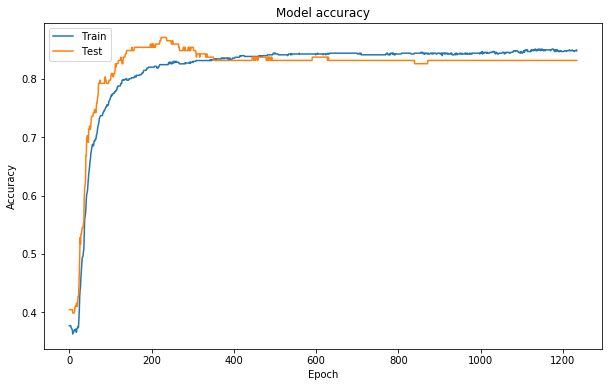

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.ylim(0.55,0.8)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

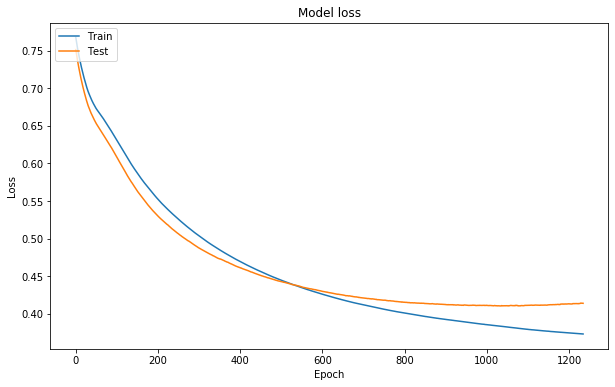

In [82]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
#plt.ylim(0.45,0.7)
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [83]:
y_pred = model.predict(X_predict)

In [84]:
converter = lambda x : 0 if x < 0.5 else 1

In [85]:
y_submit = list(map(converter, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [86]:
submission = pd.concat([test['PassengerId'],pd.DataFrame(y_submit)],axis=1)

In [87]:
submission.rename(columns={0:'Survived'}, inplace=True)

In [88]:
submission.to_csv('submission.csv', index =False)

In [89]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
